In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle


In [2]:
def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.keras.activations.sigmoid(y_pred)

    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return 1 - (numerator / (denominator + tf.keras.backend.epsilon()))


In [3]:
best_model = load_model('best_unet_model.keras', custom_objects={'dice_loss': dice_loss}, compile=False)

In [4]:
with open('val_images.pkl', 'rb') as file:
    val_images = pickle.load(file)

In [5]:
with open('val_masks.pkl', 'rb') as file:
    val_masks = pickle.load(file)

In [6]:
predictions = best_model.predict(val_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


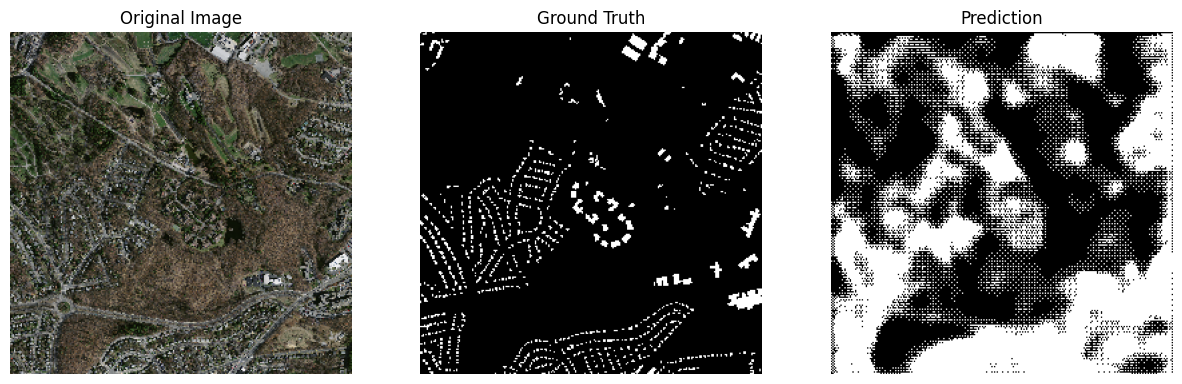

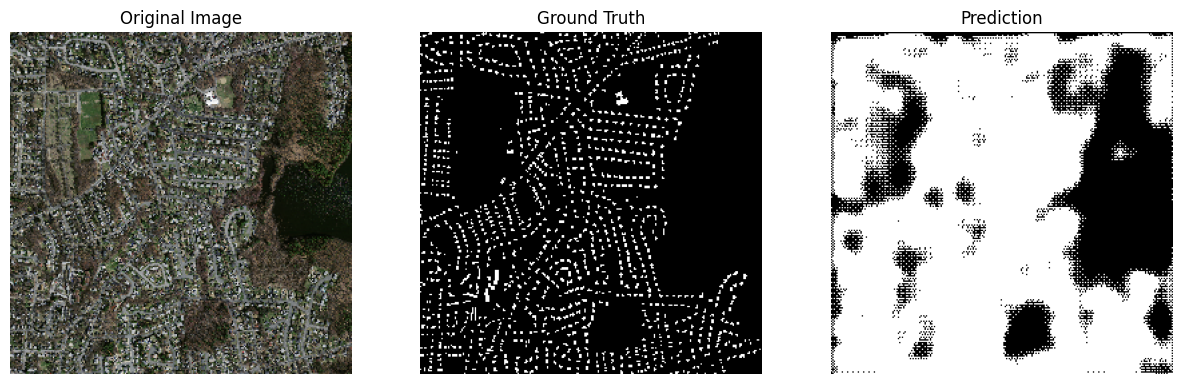

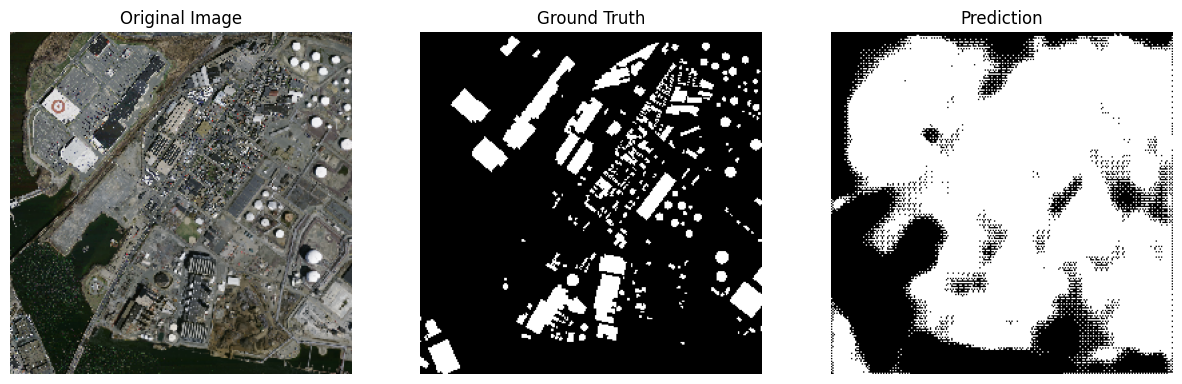

In [7]:
import matplotlib.pyplot as plt
num_col=3 

for i in range(num_col):
    original_image = val_images[i]
    ground_truth_mask = val_masks[i]
    predicted_mask = predictions[i] > 0.505  


    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth_mask, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask, cmap='gray')
    plt.title("Prediction")
    plt.axis('off')
    
    plt.show()


In [8]:
import numpy as np

# Flatten the predictions for easier analysis
flat_predictions = predictions.flatten()

# Check the minimum, maximum, and some statistics
print(f"Min: {np.min(flat_predictions)}, Max: {np.max(flat_predictions)}")
print(f"Mean: {np.mean(flat_predictions)}, Std Dev: {np.std(flat_predictions)}")


Min: 0.43699613213539124, Max: 0.5315757989883423
Mean: 0.5067373514175415, Std Dev: 0.01105003897100687
